In [ ]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay


In [ ]:
df = pd.read_csv('/content/vaccination_all_tweets.csv')

In [ ]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0.0,0.0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1.0,1.0,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0.0,0.0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446.0,2129.0,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0.0,0.0,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5059 entries, 0 to 5058
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5059 non-null   int64  
 1   user_name         5059 non-null   object 
 2   user_location     3999 non-null   object 
 3   user_description  4736 non-null   object 
 4   user_created      5059 non-null   object 
 5   user_followers    5059 non-null   int64  
 6   user_friends      5059 non-null   int64  
 7   user_favourites   5059 non-null   int64  
 8   user_verified     5059 non-null   bool   
 9   date              5059 non-null   object 
 10  text              5059 non-null   object 
 11  hashtags          3769 non-null   object 
 12  source            5058 non-null   object 
 13  retweets          5058 non-null   float64
 14  favorites         5058 non-null   float64
 15  is_retweet        5058 non-null   object 
dtypes: bool(1), float64(2), int64(4), object(9

In [ ]:
df.isnull().sum()

id                     0
user_name              0
user_location       1060
user_description     323
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1290
source                 1
retweets               1
favorites              1
is_retweet             1
dtype: int64

In [ ]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [ ]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date','hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis=1)
text_df.head()


,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [ ]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [ ]:
text_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5059 entries, 0 to 5058
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5059 non-null   object
dtypes: object(1)
memory usage: 39.6+ KB


In [ ]:
def data_processing(text):
  text = text.lower()
  text = re.sub(r"https\S+|www\S+https\S+", '', text, flags=re.MULTILINE)
  text = re.sub(r'\@w+|\#','',text)
  text = re.sub(r'[^\w\s]','',text)
  text_tokens =  word_tokenize(text)
  filtered_text = [w for w in text_tokens if not w in stop_words]
  return " ".join(filtered_text)


In [ ]:
text_df.text = text_df['text'].apply(data_processing)

In [ ]:
text_df = text_df.drop_duplicates('text')

In [ ]:
stemmer = PorterStemmer()
def stemming(data):
  text = [stemmer.stem(word) for word in data]
  return data


In [ ]:
text_df['text'] = text_df['text'].apply(lambda x:stemming(x))

In [ ]:
text_df.head()

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...


In [ ]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")


folks said daikon paste could treat cytokine storm pfizerbiontech 

world wrong side history year hopefully biggest vaccination effort weve ev 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years 

facts immutable senator even youre ethically sturdy enough acknowledge 1 born 

explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech 



In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4867 entries, 0 to 5058
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4867 non-null   object
dtypes: object(1)
memory usage: 76.0+ KB


In [ ]:
def polarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [ ]:
text_df.head(10)


,text,polarity
0,folks said daikon paste could treat cytokine s...,0.000
1,world wrong side history year hopefully bigges...,-0.500
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000
3,facts immutable senator even youre ethically s...,0.100
4,explain need vaccine borisjohnson matthancock ...,0.000
5,anyone useful adviceguidance whether covid vac...,0.400
6,bit sad claim fame success vaccination patriot...,-0.100
7,many bright days 2020 best 1 bidenharris winni...,0.675
8,covid vaccine getting covidvaccine covid19 pfi...,0.000
9,covidvaccine states start getting covid19vacci...,0.000


In [ ]:
def sentiment(label):
  if label <0:
    return "negative"

  elif label == 0:
    return "neutral"

  elif label >0:
    return "positive"


In [ ]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [ ]:
text_df.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,neutral
1,world wrong side history year hopefully bigges...,-0.5,negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,neutral
3,facts immutable senator even youre ethically s...,0.1,positive
4,explain need vaccine borisjohnson matthancock ...,0.0,neutral


<Axes: xlabel='sentiment', ylabel='count'>

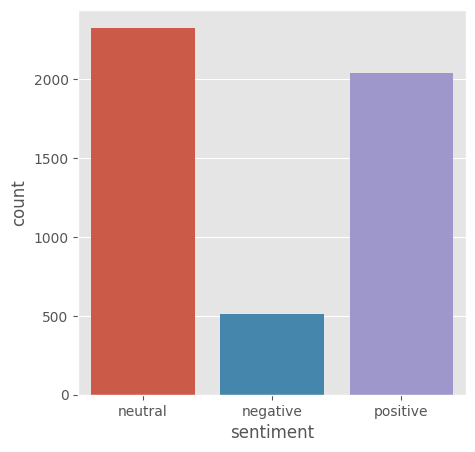

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment',data=text_df)

Text(0.5, 1.0, 'Distribution of Sentiments')

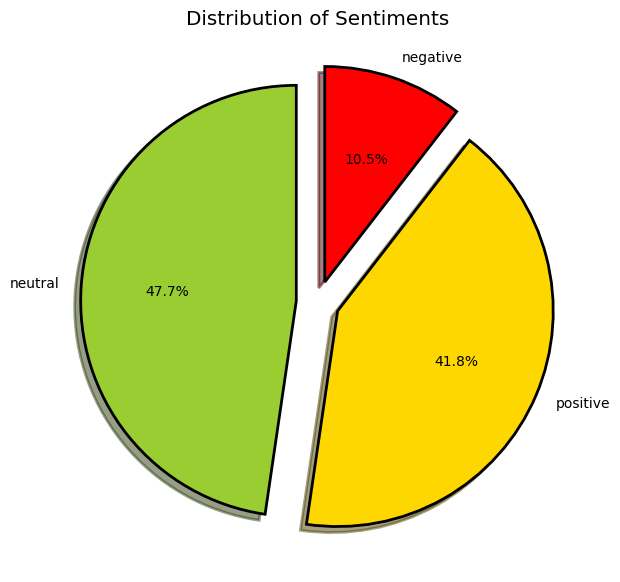

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen","gold","red")
wp = {'linewidth':2,'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%',shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title('Distribution of Sentiments')


Positive Sentiment Tweets:
                                                   text sentiment  polarity
3992  1st vaccine jab done today efficiently done ex...  positive  1.000000
3788  saw awesome comparison pfizer vaccine vs moder...  positive  1.000000
4417  best feeling got covidvaccine lets keep going ...  positive  1.000000
2340  applying emotion pfizerbiontech based best evi...  positive  1.000000
3112  faheemyounus dear dr would like ask best windo...  positive  1.000000
...                                                 ...       ...       ...
2630  pretty rough time 1st vaccine expecting rough ...  positive  0.012500
3410  22 last 20 years far think back single medicin...  positive  0.007143
3126  never excited get stabbed arm thank wilbur ucl...  positive  0.006250
362   little vial carries much scientists worked tir...  positive  0.006250
1263  year tough light end tunnel arrived scarboroug...  positive  0.005556

[2036 rows x 3 columns]



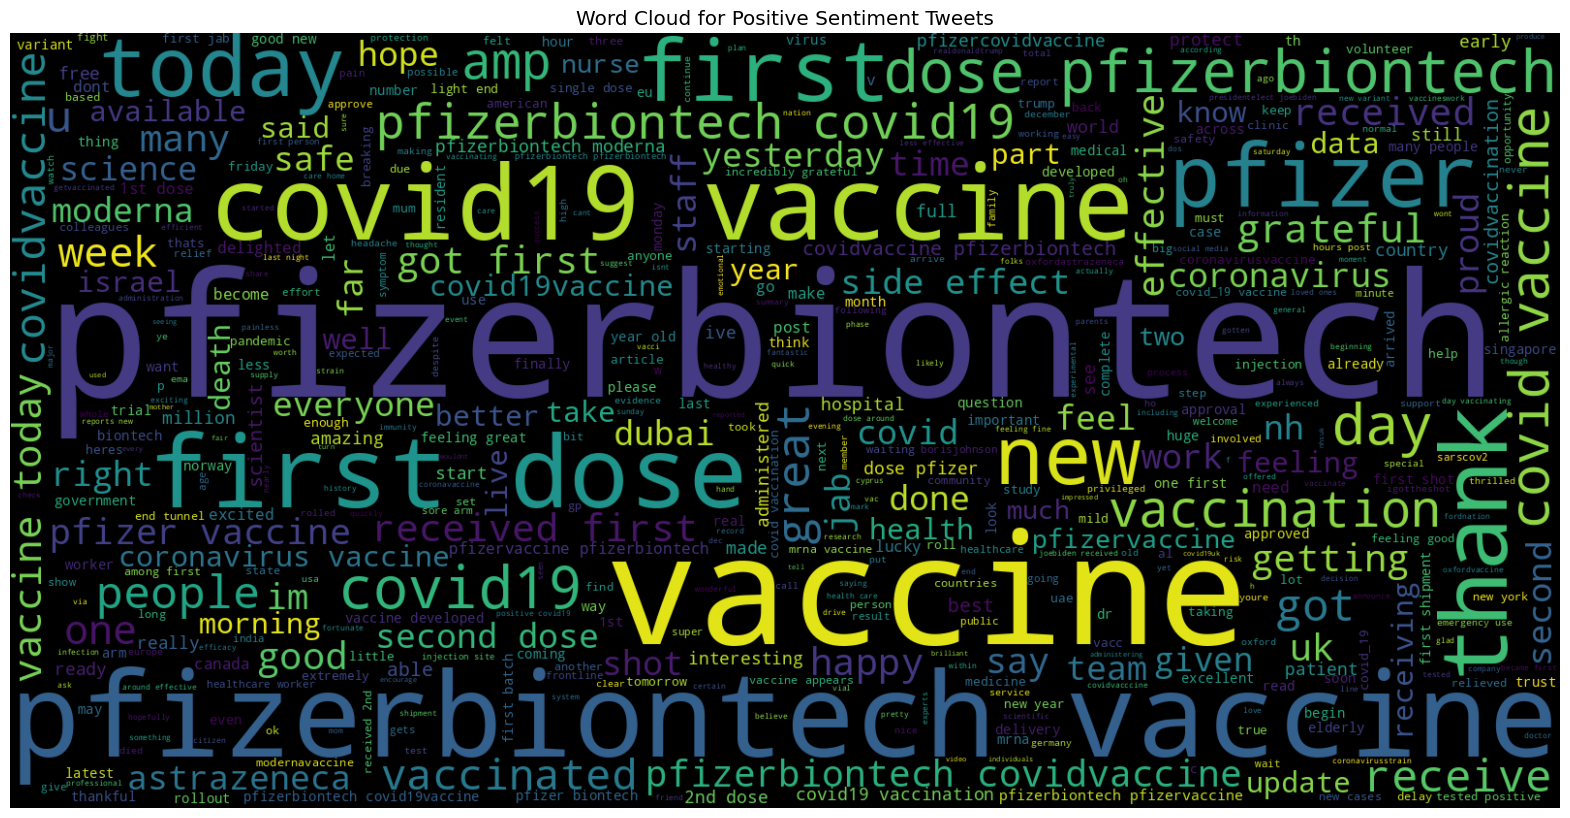

Negative Sentiment Tweets:
                                                   text sentiment  polarity
2912  work skilled nursing facility got first vaccin...  negative -0.003333
2073  ukgovernment cant even vaccinate properly ethi...  negative -0.004762
2907  2015 worried absence mrna vaccine challenge wa...  negative -0.006250
3894  mrna may change vaccine game person multiple s...  negative -0.006250
4976  trishgreenhalgh im unfortunate sod tested posi...  negative -0.007576
...                                                 ...       ...       ...
1988  scared fearful petrified take shot usa us covi...  negative -0.900000
2082  hopefully protected horrible virus protecting ...  negative -1.000000
3780  death 23 peoples norway receiving pfizerbionte...  negative -1.000000
4906  vonderleyen evil face would resemble covid19 v...  negative -1.000000
4446          pharmaceutical greed worst pfizerbiontech  negative -1.000000

[510 rows x 3 columns]



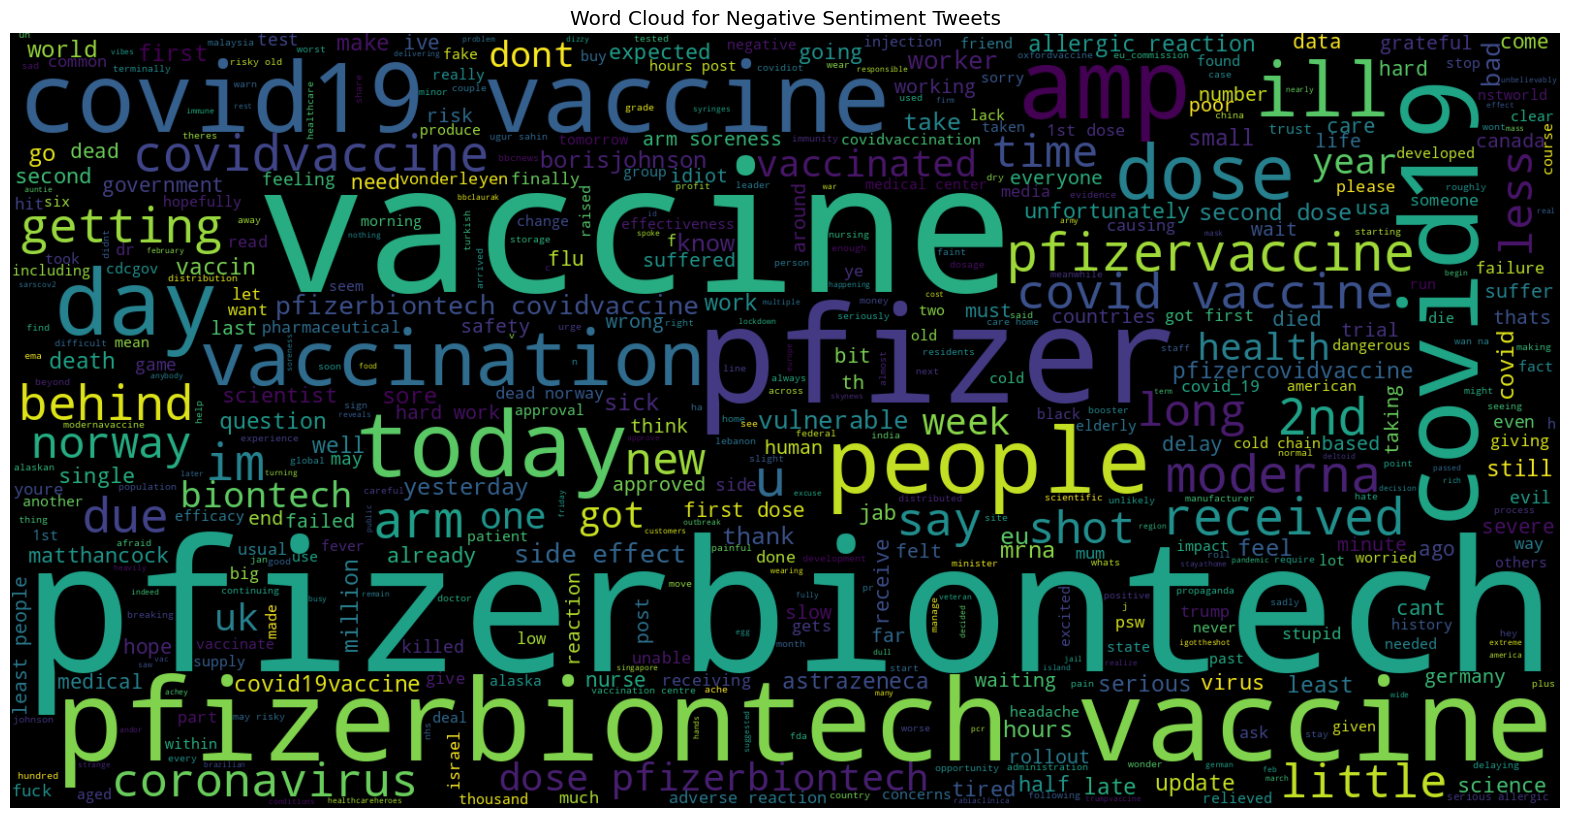

Neutral Sentiment Tweets:
                                                   text sentiment  polarity
0     folks said daikon paste could treat cytokine s...   neutral       0.0
3320  side effects socalled cure harmful virus moder...   neutral       0.0
3365  today got vaccinated vaccinated pfizerbiontech...   neutral       0.0
3367  48 hours since second pfizerbiontech vaccine s...   neutral       0.0
3371  2nd dose rolling 2021 like queen covidvaccine ...   neutral       0.0
...                                                 ...       ...       ...
1647  alanbixter drajm njbbari3 devisridhar youarelo...   neutral       0.0
1651  registered nurse nashvilletn taking sarscov2 v...   neutral       0.0
1653  tiffanydover one news vaccin covidvaccine covi...   neutral       0.0
1654  bill gates amp walter white breaking gates pai...   neutral       0.0
5057  thinking get jabs vaccine get one jab one amp ...   neutral       0.0

[2321 rows x 3 columns]



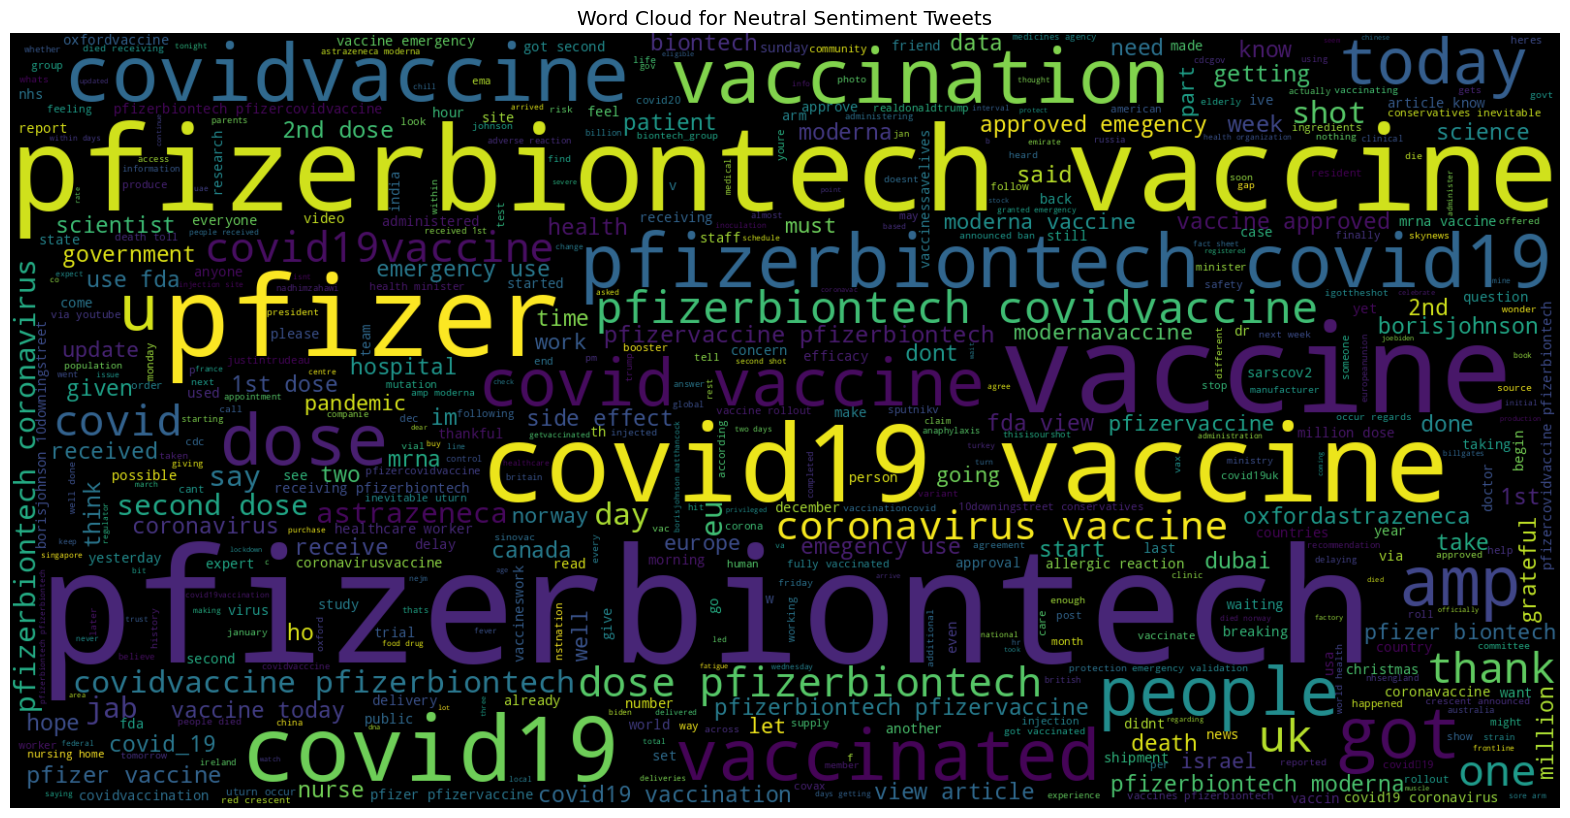

In [ ]:
pos_tweets = text_df[text_df['sentiment'] == 'positive']
neg_tweets = text_df[text_df['sentiment'] == 'negative']
neu_tweets = text_df[text_df['sentiment'] == 'neutral']

# Sort sentiment tweets based on 'polarity' in descending order
pos_tweets = pos_tweets.sort_values(by='polarity', ascending=False)
neg_tweets = neg_tweets.sort_values(by='polarity', ascending=False)
neu_tweets = neu_tweets.sort_values(by='polarity', ascending=False)

# Display the positive sentiment tweets with their sentiment and polarity values
print("Positive Sentiment Tweets:")
print(pos_tweets[['text', 'sentiment', 'polarity']])
print()

# Check if there are any positive sentiment tweets to generate a word cloud
if not pos_tweets.empty:
    # Join the 'text' column of positive sentiment tweets
    text_pos = ' '.join([word for word in pos_tweets['text']])

    # Generate the word cloud for positive sentiment tweets
    plt.figure(figsize=(20, 15), facecolor='None')
    wordcloud_pos = WordCloud(max_words=500, width=1600, height=800).generate(text_pos)
    plt.imshow(wordcloud_pos, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for Positive Sentiment Tweets")
    plt.show()
else:
    print("No positive sentiment tweets to generate a word cloud from.")

# Display the negative sentiment tweets with their sentiment and polarity values
print("Negative Sentiment Tweets:")
print(neg_tweets[['text', 'sentiment', 'polarity']])
print()

# Check if there are any negative sentiment tweets to generate a word cloud
if not neg_tweets.empty:
    # Join the 'text' column of negative sentiment tweets
    text_neg = ' '.join([word for word in neg_tweets['text']])

    # Generate the word cloud for negative sentiment tweets
    plt.figure(figsize=(20, 15), facecolor='None')
    wordcloud_neg = WordCloud(max_words=500, width=1600, height=800).generate(text_neg)
    plt.imshow(wordcloud_neg, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for Negative Sentiment Tweets")
    plt.show()
else:
    print("No negative sentiment tweets to generate a word cloud from.")

# Display the neutral sentiment tweets with their sentiment and polarity values
print("Neutral Sentiment Tweets:")
print(neu_tweets[['text', 'sentiment', 'polarity']])
print()

# Check if there are any neutral sentiment tweets to generate a word cloud
if not neu_tweets.empty:
    # Join the 'text' column of neutral sentiment tweets
    text_neu = ' '.join([word for word in neu_tweets['text']])

    # Generate the word cloud for neutral sentiment tweets
    plt.figure(figsize=(20, 15), facecolor='None')
    wordcloud_neu = WordCloud(max_words=500, width=1600, height=800).generate(text_neu)
    plt.imshow(wordcloud_neu, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for Neutral Sentiment Tweets")
    plt.show()
else:
    print("No neutral sentiment tweets to generate a word cloud from.")

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])


In [ ]:

# Get the feature names from the CountVectorizer object
feature_names = vect.get_feature_names_out()

# Display the number of features and the first 20 features
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 41306

First 20 features:
 ['000' '000 initial' '000 people' '004' '004 israelis' '02' '02 175'
 '02 adverse' '02012021' '02012021 grateful' '040120' '045' '045 ml'
 '045 pe' '05' '05 became' '08012021' '08012021 feeling' '09' '09 sodium']


In [ ]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
print("Size of  x_train:",(x_train.shape))
print("Size of  y_test:",(x_test.shape))
print("Size of  y_train:",(y_train.shape))
print("Size of  y_test:",(y_test.shape))

Size of  x_train: (3893, 41306)
Size of  y_test: (974, 41306)
Size of  y_train: (3893,)
Size of  y_test: (974,)


In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred,y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))


Test accuracy: 79.88%


In [ ]:
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[ 19  66  25]
 [  0 435   5]
 [  1  99 324]]


              precision    recall  f1-score   support

    negative       0.95      0.17      0.29       110
     neutral       0.72      0.99      0.84       440
    positive       0.92      0.76      0.83       424

    accuracy                           0.80       974
   macro avg       0.86      0.64      0.65       974
weighted avg       0.83      0.80      0.77       974



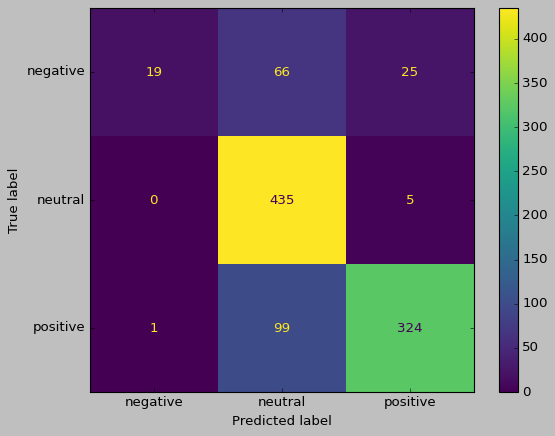

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test,logreg_pred,labels=logreg.classes_)
disp =  ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)
disp.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score



In [ ]:
scaler = StandardScaler(with_mean=False)

# Fit and transform the scaler on the training data
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data using the fitted scaler
x_test_scaled = scaler.transform(x_test)

# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [100, 200, 300, 400]}

# Create a GridSearchCV object with LogisticRegression estimator and the parameter grid
grid = GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid)

# Fit the model on the scaled training data
grid.fit(x_train_scaled, y_train)

# Find the best parameters found by GridSearchCV
best_params = grid.best_params_
print("Best parameters:", best_params)

# Get the best model (fitted with the best parameters) from the GridSearchCV
best_model = grid.best_estimator_

# Make predictions on the scaled test data using the best model
y_pred = best_model.predict(x_test_scaled)

# Calculate the accuracy of the model on the test set
logreg_acc = accuracy_score(y_test, y_pred)
print("Test accuracy: {:.2f}%".format(logreg_acc * 100))

Best parameters: {'C': 0.001, 'max_iter': 100}
Test accuracy: 67.25%


In [ ]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[  5  83  22]
 [  0 407  33]
 [  0 181 243]]


              precision    recall  f1-score   support

    negative       1.00      0.05      0.09       110
     neutral       0.61      0.93      0.73       440
    positive       0.82      0.57      0.67       424

    accuracy                           0.67       974
   macro avg       0.81      0.51      0.50       974
weighted avg       0.74      0.67      0.63       974



In [ ]:
# Assuming you have already imported necessary libraries and split the data into x_train, x_test, y_train, and y_test.

# Importing LinearSVC from sklearn.svm
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Creating a LinearSVC model
svc_model = LinearSVC()

# Fitting the model on the training data
svc_model.fit(x_train, y_train)

# Making predictions on the test data
svc_pred = svc_model.predict(x_test)

# Calculating the accuracy of the model on the test set
svc_acc = accuracy_score(y_test, svc_pred)
print("Test accuracy: {:.2f}%".format(svc_acc * 100))



Test accuracy: 82.03%


In [ ]:
print(confusion_matrix(y_test,svc_pred))
print("\n")
print(classification_report(y_test,svc_pred))

[[ 30  56  24]
 [  3 431   6]
 [  3  83 338]]


              precision    recall  f1-score   support

    negative       0.83      0.27      0.41       110
     neutral       0.76      0.98      0.85       440
    positive       0.92      0.80      0.85       424

    accuracy                           0.82       974
   macro avg       0.84      0.68      0.71       974
weighted avg       0.84      0.82      0.80       974



In [ ]:
# Function to classify sentiment based on user input
def classify_sentiment(sentiment_score):
    if sentiment_score > 0.2:
        return "Positive"
    elif sentiment_score < -0.2:
        return "Negative"
    else:
        return "Neutral"

# Get user input
user_input = input("Enter your sentiment: ")

# Perform sentiment analysis (You may use more advanced sentiment analysis methods here)
# For simplicity, let's assume sentiment_score is a value between -1 to 1, where -1 is very negative and 1 is very positive.
# Replace this with your actual sentiment analysis code for more accurate results.
sentiment_score = 0.0  # Replace with your sentiment analysis result

# Classify sentiment based on the sentiment score
sentiment = classify_sentiment(sentiment_score)

# Display the result
print("Your sentiment is:", sentiment)


Enter your sentiment: 1
Your sentiment is: Neutral
